<a href="https://colab.research.google.com/github/Elwing-Chou/ml0804/blob/master/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((訓練圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
trans = [
    "T-shirt",
	"Trouser",
	"Pullover",
	"Dress",
	"Coat",
	"Sandal",
	"Shirt",
	"Sneaker",
	"Bag",
	"Boot"
]

Boot


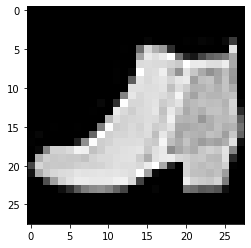

In [8]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 59999)
print(trans[y_train[idx]])
# cmap="gray"
plt.imshow(x_train[idx], cmap="gray")

In [11]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

layers = [
    # 784 * 128 + 128(bias)
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10(連線個數) + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 交叉商: p1 * log(1/q1) + p2 * log(1/q2)....
# 多個: Categorical CrossEntropy
# 一個: Binary CrossEntropy p * log(1/q) + (1-p) * log(1/1-q)
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [14]:
# 資料處理: x
# reshape: -1(numpy會幫你算該等於多少, 只能一個)
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [15]:
# batch:看幾筆在調整一次(20-200)
# epochs:整份訓練資料看幾遍 (10->60000*10)
# verbose: 0(quiet) 1(default) 2(我喜歡的)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train,
     validation_split=0.1,
     batch_size=200,
     epochs=100,
     verbose=2,
     callbacks=callbacks)

Epoch 1/100
270/270 - 2s - loss: 0.5697 - accuracy: 0.8053 - val_loss: 0.4393 - val_accuracy: 0.8458
Epoch 2/100
270/270 - 2s - loss: 0.4047 - accuracy: 0.8581 - val_loss: 0.4103 - val_accuracy: 0.8493
Epoch 3/100
270/270 - 2s - loss: 0.3622 - accuracy: 0.8715 - val_loss: 0.3595 - val_accuracy: 0.8687
Epoch 4/100
270/270 - 2s - loss: 0.3354 - accuracy: 0.8801 - val_loss: 0.3472 - val_accuracy: 0.8745
Epoch 5/100
270/270 - 2s - loss: 0.3130 - accuracy: 0.8878 - val_loss: 0.3437 - val_accuracy: 0.8737
Epoch 6/100
270/270 - 2s - loss: 0.2959 - accuracy: 0.8928 - val_loss: 0.3325 - val_accuracy: 0.8797
Epoch 7/100
270/270 - 2s - loss: 0.2837 - accuracy: 0.8976 - val_loss: 0.3210 - val_accuracy: 0.8818
Epoch 8/100
270/270 - 2s - loss: 0.2750 - accuracy: 0.9010 - val_loss: 0.3433 - val_accuracy: 0.8745
Epoch 9/100
270/270 - 2s - loss: 0.2632 - accuracy: 0.9037 - val_loss: 0.3081 - val_accuracy: 0.8852
Epoch 10/100
270/270 - 2s - loss: 0.2530 - accuracy: 0.9076 - val_loss: 0.3044 - val_accura

In [16]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3224 - accuracy: 0.8861


[0.32235386967658997, 0.8860999941825867]

In [18]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat, 
       columns=["{}(預測)".format(trans[i]) for i in range(10)],
       index=["{}(真實)".format(trans[i]) for i in range(10)])

,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Boot(預測)
T-shirt(真實),869,2,14,12,5,1,91,0,6,0
Trouser(真實),3,973,0,17,3,0,3,0,1,0
Pullover(真實),16,0,815,7,84,0,77,0,1,0
Dress(真實),34,8,15,842,55,0,42,0,4,0
Coat(真實),1,1,94,13,804,0,82,0,5,0
Sandal(真實),0,0,0,0,0,961,0,24,1,14
Shirt(真實),135,1,83,15,54,0,702,0,10,0
Sneaker(真實),0,0,0,0,0,10,0,963,0,27
Bag(真實),8,0,8,2,5,1,4,4,968,0
Boot(真實),0,0,0,0,0,7,1,28,0,964


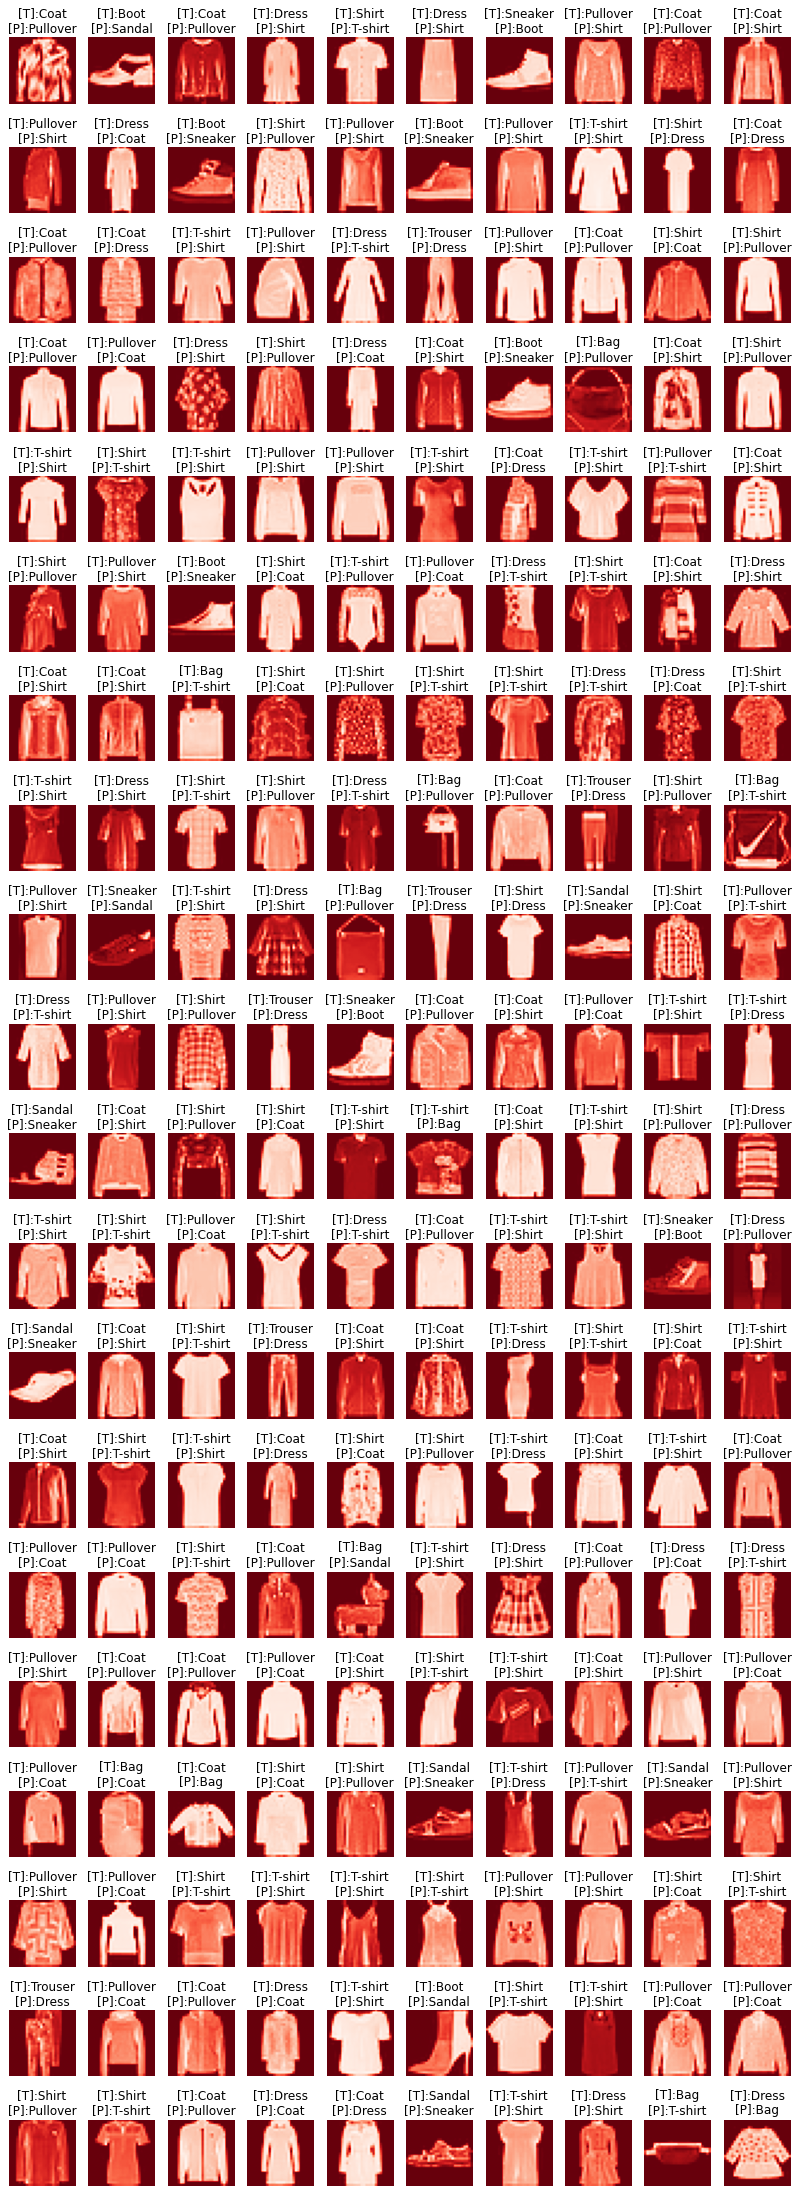

In [19]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
idx = idx[:200]
img, label, pred = x_test[idx], y_test[idx], pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(img) // width + 1
for i in range(len(img)):
    plt.subplot(height, width, i+1)
    t = "[T]:{}\n[P]:{}".format(trans[label[i]], trans[pred[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img[i], cmap="Reds_r")

檔名:test3.png
答案: Shirt
0 的機率: 0.121
1 的機率: 0.0
2 的機率: 0.021
3 的機率: 0.004
4 的機率: 0.262
5 的機率: 0.0
6 的機率: 0.557
7 的機率: 0.0
8 的機率: 0.034
9 的機率: 0.0


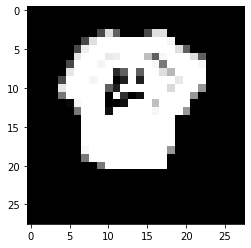

In [20]:
# https://pillow.readthedocs.io/en/5.1.x/handbook/concepts.html#concept-modes
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_norm = np.array(img).reshape(1, 784) / 255
ans = model.predict_classes(img_norm)
print("答案:", trans[ans[0]])
prob = model.predict(img_norm)[0]
for i, p in enumerate(prob):
    print(i, "的機率:", round(p, 3))
plt.imshow(img, cmap="gray")